In [1]:
#Overview:

#Interesting dataset that had some rather expected findings to it.

#First trend of note is that urban dominates the percentages of
#total rides, total drivers and total fare amounts.  Not surprising since
#populations tend to follow a urban > surburban > rural trend.  Perhas this
#could lead to further research into logistics for data such as route mapping
#to maximize potential revenue in heavily populated areas.

#Second trend of note is that while population may follow the
#urban > suburban > rural trend, average fare was the exact opposite. However,
#this is not surprising due to the long distances that must be traveled to and
#from homes and businesses that are in rural areas.  Given the high average fare,
#it may be beneficial for Pyber to look into advertising into rural areas more
#due to the potential revenue that these areas could bring in.

#Third trend is not necessarily a trend but just a note that bothered me regarding
#the average fares for urban cities.  It seemed a bit high for me as it hovered
#between $20 and $30.  Given that people do not have to travel very far within an urban
#environment, it would be expected that the average fare would reflect this.  This is
#probably due to fares being based predominantly on time, not distance.  

#Perhaps the biggest reason I found this odd was it made me think back to the years
#in my youth were I lived in one of the busiest urban environments in the world in
#Tokyo, Japan.  I have distinct memories of taking taxis almost everyday all over the
#city and having the total fare never being over $20 (this also being years before the
#widespread availability of gps).  Granted, most taxis in Japan charged by distance 
#which was why this method of transportation was one of the few inexpensive things in 
#the city.  The very low fares made it a very attractive way to get around town.

#Perhaps this could be a point to experiment with to see if having urban fares based
#predominantly on distance over time (assuming they are currently based on time) could 
#bring in more potential revenue following a hypothesis that lower fares should raise 
#overall demand (which should already be high in an urban environment).  This could bring
#in a conflict with it being not profitable for drivers however, my past experience with
#this in Japan and many taxi drivers having no issues making a living off this model
#makes me believe it is worth looking into.

#However, if the fares are in fact based on distance, I would still want to figure out
#the reason behind why the average is higher than expected.

#Tried to follow pep8 standards the best I could.  Hopefully, the code is easier to
#read and understand.

In [2]:
#Modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns



#Procedure to read in city and ride csv files.
city="Resources/city_data.csv"
ride="Resources/ride_data.csv"
city_df=pd.read_csv(city, encoding="utf-8")
ride_df=pd.read_csv(ride, encoding="utf-8")



#Merge the 2 files and rename columns.
pyber_df=pd.merge(city_df, ride_df, on="city")
pyber_df=pyber_df.rename(columns= {
                "city": "City", "driver_count": "Driver Count",
                "type": "Type", "date": "Date", "fare": "Fare",
                "ride_id": "Ride ID"}
                )


In [3]:
#Set up to have the sum of total fares for each city.  The steps to do this are:
# 1) Get a dataframe with just City and Fare
# 2) Group the new dataframe by City and sum all columns while resetting the index.

pyber_city_fare=pyber_df[["City", "Fare"]]
pyber_city_fare_total=pyber_city_fare.groupby(['City']).sum().reset_index()
pyber_city_fare_total.head()

,City,Fare
0,Amandaburgh,443.55
1,Barajasview,557.31
2,Barronchester,582.76
3,Bethanyland,593.21
4,Bradshawfurt,400.64


In [4]:
#Since driver count is the same for every row for a specific city, there is
#no need to do anything complicated to get it displayed with the correct city.
#Simply drop all other columns except City, Driver Count and Type while using
#drop_duplicates in a similar fashion to the pandas homework to remove the
#duplicate city rows.

pyber_city_driver_count=pyber_df[["City", "Driver Count", "Type"]]
pyber_city_driver_count.drop_duplicates("City", keep="first", inplace=True)
pyber_city_driver_count.head()

,City,Driver Count,Type
0,Richardfort,38,Urban
28,Williamsstad,59,Urban
51,Port Angela,67,Urban
70,Rodneyfort,34,Urban
93,West Robert,39,Urban


In [5]:
#To get total ride counts, simply drop all columns except City and Ride ID from the
#base dataframe and group by City while counting all the rows in each column to work
#as a counter for Ride Count.  The index is reset so City can be referenced again
#later on.

pyber_city_ride=pyber_df[["City", "Ride ID"]]
pyber_city_ride_count=pyber_city_ride.groupby(['City']).count().reset_index()

In [6]:
#These are the statistics needed for the bubble plot.  A dataframe is needed that has:
# 1) City 
# 2) Type 
# 3) Driver Count 
# 4) Total Number of Rides
# 5) Average Fare Amount, 
# 6) Total Fare Amount.

# The pyber_city_fare_total, pyber_city_driver_count, and pyber_city_ride_count dateframes
#must be merged into a single dataframe called pyber_city_fare_mu on City all on the City
#variable.  .
pyber_city_fare_mu=pd.merge(pyber_city_fare_total, pyber_city_driver_count, on="City")
pyber_city_fare_mu=pd.merge(pyber_city_fare_mu, pyber_city_ride_count, on="City")



#Renaming columns.
pyber_city_fare_mu=pyber_city_fare_mu.rename(columns={
                "Ride ID": "Total Number of Rides",
                "Fare": "Total Fare Amount"}
                )



#Way to calculate the average fare amount per city.
pyber_city_fare_mu["Average Fare Amount"]=(
        pyber_city_fare_mu["Total Fare Amount"]
            / pyber_city_fare_mu["Total Number of Rides"]
        )



#Drop any unnecessary columns.
pyber_city_fare_mu=pyber_city_fare_mu[[
            "City", "Type", "Driver Count", 
            "Total Number of Rides","Average Fare Amount",
            "Total Fare Amount"]
            ]



pyber_city_fare_mu.head()

,City,Type,Driver Count,Total Number of Rides,Average Fare Amount,Total Fare Amount
0,Amandaburgh,Urban,12,18,24.641667,443.55
1,Barajasview,Urban,26,22,25.332273,557.31
2,Barronchester,Suburban,11,16,36.422500,582.76
3,Bethanyland,Suburban,22,18,32.956111,593.21
4,Bradshawfurt,Rural,7,10,40.064000,400.64


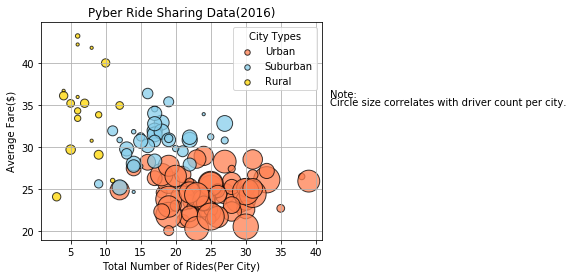

In [7]:
#Code for bubble plot using the pyber_city_fare_mu dataframe.


#Set up a dataframe with each city type, drop all but the Total Number
#of Rides, Average Fare Amount, and Driver Count columns and turn it into
#an array for easier referencing in plt.scatter.
rural_df=pyber_city_fare_mu.loc[pyber_city_fare_mu["Type"]=="Rural", :]
rural_df=rural_df[[
        "Total Number of Rides", "Average Fare Amount", "Driver Count"]
        ]



rural=np.asarray(rural_df)



suburban_df=pyber_city_fare_mu.loc[pyber_city_fare_mu["Type"]=="Suburban", :]
suburban_df=suburban_df[[
    "Total Number of Rides", "Average Fare Amount", "Driver Count"]
    ]



suburban=np.asarray(suburban_df)



urban_df=pyber_city_fare_mu.loc[pyber_city_fare_mu["Type"]=="Urban", :]
urban_df=urban_df[[
    "Total Number of Rides", "Average Fare Amount", "Driver Count"]
    ]



urban = np.asarray(urban_df)



#City type scatter plots.  Each point is multipled by a factor of 10 for
#extra emphasis within the bubbles in the plot.
urban_plot=plt.scatter(urban[:,0], urban[:,1], s=urban[:,2]*10, \
                         c="coral", alpha=0.75, marker="o",  \
                         edgecolor="black", linewidths=1
                        )



suburban_plot=plt.scatter(suburban[:,0], suburban[:,1], s=suburban[:,2]*10, \
                          c="skyblue", alpha=0.75, marker="o", \
                          edgecolor="black", linewidths=1
                         )                        



rural_plot=plt.scatter(rural[:,0], rural[:,1], s=rural[:,2]*10, \
                       c="gold", alpha = 0.75, marker="o",  \
                       edgecolor="black", linewidths=1
                      )


#Plot title and legend
plt.title('Pyber Ride Sharing Data(2016)')
lgnd = plt.legend((urban_plot, suburban_plot, rural_plot), \
                  ("Urban", "Suburban", "Rural"), \
                  loc="upper right", title="City Types", fontsize=10
                  )



#This makes all 3 markers in the legend the same size.
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]



#Adds text to left side of graph.
plt.text(42, 36, "Note:", fontsize=10)
plt.text(42, 35, "Circle size correlates with driver count per city.", fontsize=10)
plt.subplots_adjust(left=0.25)



#Adds labels, y axis, grid and saves as png file.
plt.xlabel("Total Number of Rides(Per City)")
plt.ylabel("Average Fare($)")
plt.ylim([19,44.9])
plt.grid()
plt.savefig("Bubble_Plot.png")
plt.show()

In [31]:
#Raw data to use for the percentages in the pie chart.
pyber_city_type=pyber_city_fare_mu.groupby(['Type']).sum().reset_index()
pyber_city_type

,Type,Driver Count,Total Number of Rides,Average Fare Amount,Total Fare Amount
0,Rural,78,125,623.479771,4327.93
1,Suburban,490,625,1106.542729,19356.33
2,Urban,2405,1625,1616.942033,39854.38


In [32]:
#Percentages by city Type
pyber_city_type["% of Total Drivers"]=pyber_city_type["Driver Count"] \
                                        /(pyber_city_type["Driver Count"].sum()
                                         )
    
    
pyber_city_type["% of Total Rides"]=pyber_city_type["Total Number of Rides"] \
                                        /(pyber_city_type["Total Number of Rides"].sum()
                                         )
    
    
    
pyber_city_type["% of Total Fares"]=pyber_city_type["Total Fare Amount"] \
                                        /(pyber_city_type["Total Fare Amount"].sum()
                                         )
    
    

#Dataframe that will be used for the 3 pie charts.
pyber_city_type_p=pyber_city_type[["Type", "% of Total Fares", \
                                   "% of Total Rides", "% of Total Drivers"]
                                   ]



pyber_city_type_p

,Type,% of Total Fares,% of Total Rides,% of Total Drivers
0,Rural,0.068115,0.052632,0.026236
1,Suburban,0.304639,0.263158,0.164817
2,Urban,0.627246,0.684211,0.808947


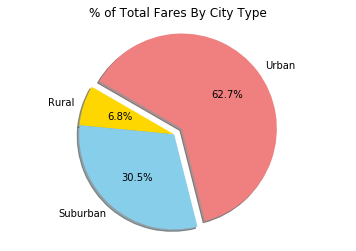

In [33]:
#Total Fares Percent Pie Chart
#Lables and fare %.
labels=pyber_city_type_p["Type"].values.tolist()
fares=pyber_city_type_p["% of Total Fares"].values.tolist()



#Sets urban as pacman slice and set colors.
explode=(0, 0, 0.1)
colors=["gold", "skyblue", "LightCoral"]



#Title and pie chart.
plt.title('% of Total Fares By City Type')
plt.pie(fares, explode=explode, labels=labels, colors=colors, \
        radius=1, autopct="%1.1f%%", shadow=True, startangle=150
       )



#Sets axis equal and saves as a png file.
plt.axis('equal')
plt.savefig("Pyber_Fares.png")
plt.show()

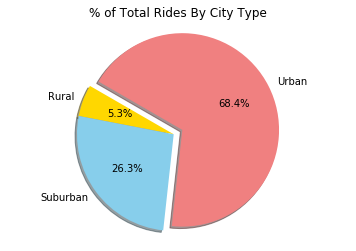

In [19]:
#Total Ride Percent Pie Chart
#Ride % and uses same label as Fare % pie chart.
rides=pyber_city_type_p["% of Total Rides"].values.tolist()
rides=[round(x,3) for x in rides]



#Sets urban as pacman slice and sets colors.
explode=(0, 0, 0.1)
colors=["gold", "skyblue", "LightCoral"]



#Title and pie chart.
plt.title('% of Total Rides By City Type')
plt.pie(rides, explode=explode, labels=labels, colors=colors, \
        radius=1, autopct="%1.1f%%", shadow=True, startangle=150
       )



#Sets axis equal and saves as a png file.
plt.axis('equal')
plt.savefig("Pyber_Rides.png")
plt.show()

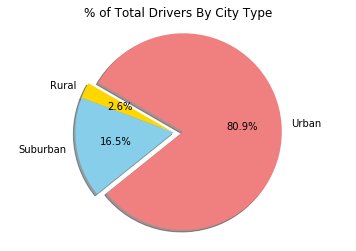

In [20]:
#Total Drivers Percentage Pie Chart
#Drivers % and uses same label as Fare % pie chart.
drivers=pyber_city_type_p["% of Total Drivers"].values.tolist()
drivers=[round(x,3) for x in drivers]



#Sets urban as pacman slice and sets colors.
explode=(0, 0, 0.1)
colors=["gold", "skyblue", "LightCoral"]



#Title and pie chart.
plt.title('% of Total Drivers By City Type')
plt.pie(drivers, explode=explode, labels=labels, colors=colors, \
        radius=1, autopct="%1.1f%%", shadow=True, startangle=150
       )



#Sets axis equal and saves as a png file.
plt.axis('equal')
plt.savefig("Pyber_Drivers.png")
plt.show()